In [1]:
!pip install albumentations

     |████████████████████████████████| 122kB 12.8MB/s eta 0:00:01
     |████████████████████████████████| 634kB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 21.6MB 30.2MB/s eta 0:00:01
     |████████████████████████████████| 12.4MB 31.9MB/s eta 0:00:01
     |████████████████████████████████| 133kB 60.9MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 56.2MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 56.2MB/s eta 0:00:01
     |████████████████████████████████| 3.3MB 17.3MB/s eta 0:00:01
     |████████████████████████████████| 19.3MB 30.5MB/s eta 0:00:01
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64384 sha256=c0bd060f46a53e80adf5aff2f67f5ea8345110dfeadfe99b4094bd66d3380efa
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=10bd8dbde1722b7c7e7f5c69138b82c4b

In [2]:
import os
from PIL import Image
import time
import copy
import warnings
import random
import numpy as np
import pandas as pd
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import functional as F
import torchvision
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader, Dataset, sampler
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from albumentations import (HorizontalFlip,VerticalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise,RandomRotate90,Transpose,RandomBrightnessContrast,RandomCrop)
from albumentations.pytorch import ToTensor
import albumentations as albu
import matplotlib.image as mpi
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")
seed = 69
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
!unzip test_Bh8pGW3.zip

Archive:  test_Bh8pGW3.zip
   creating: Test/
  inflating: test.csv                
  inflating: Test/10.jpg             
  inflating: Test/1000.jpg           
  inflating: Test/10002.jpg          
  inflating: Test/10003.jpg          
  inflating: Test/10005.jpg          
  inflating: Test/10006.jpg          
  inflating: Test/1001.jpg           
  inflating: Test/10010.jpg          
  inflating: Test/10012.jpg          
  inflating: Test/10014.jpg          
  inflating: Test/10020.jpg          
  inflating: Test/10022.jpg          
  inflating: Test/10024.jpg          
  inflating: Test/10029.jpg          
  inflating: Test/10032.jpg          
  inflating: Test/10033.jpg          
  inflating: Test/10037.jpg          
  inflating: Test/10039.jpg          
  inflating: Test/10042.jpg          
  inflating: Test/10044.jpg          
  inflating: Test/10049.jpg          
  inflating: Test/10052.jpg          
  inflating: Test/10054.jpg          
  inflating: Test/10060.jpg          
  in

In [4]:
!unzip train_DETg9GD.zip

Archive:  train_DETg9GD.zip
   creating: Train/
  inflating: train.csv               
  inflating: Train/0.jpg             
  inflating: Train/1.jpg             
  inflating: Train/100.jpg           
  inflating: Train/10000.jpg         
  inflating: Train/10001.jpg         
  inflating: Train/10004.jpg         
  inflating: Train/10007.jpg         
  inflating: Train/10008.jpg         
  inflating: Train/10009.jpg         
  inflating: Train/10011.jpg         
  inflating: Train/10013.jpg         
  inflating: Train/10015.jpg         
  inflating: Train/10016.jpg         
  inflating: Train/10017.jpg         
  inflating: Train/10018.jpg         
  inflating: Train/10019.jpg         
  inflating: Train/1002.jpg          
  inflating: Train/10021.jpg         
  inflating: Train/10023.jpg         
  inflating: Train/10025.jpg         
  inflating: Train/10026.jpg         
  inflating: Train/10027.jpg         
  inflating: Train/10028.jpg         
  inflating: Train/1003.jpg          
  

In [5]:
img = plt.imread('Train/10023.jpg')

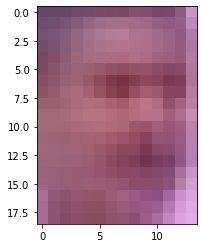

In [6]:
plt.imshow(img)

In [7]:
train_df = pd.read_csv('train.csv')

In [8]:
train_df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [9]:
df1 = train_df['Class']
df2 = train_df["ID"]
df1 = pd.get_dummies(df1)
df = pd.concat([df2,df1], axis=1)
df.head()

,ID,MIDDLE,OLD,YOUNG
0,377.jpg,1,0,0
1,17814.jpg,0,0,1
2,21283.jpg,1,0,0
3,16496.jpg,0,0,1
4,4487.jpg,1,0,0


In [10]:
classes = ['MIDDLE','OLD','YOUNG']
df.shape

(19906, 4)

In [11]:
size = df.shape[0]
for i in range(50):
    ind = random.randint(0,size)
    name = df.iloc[ind][0]
    path = 'Train/'+str(name)
    img = plt.imread(path)
    print(img.shape)

(92, 57, 3)
(57, 38, 3)
(81, 49, 3)
(86, 77, 3)
(166, 98, 3)
(41, 32, 3)
(41, 36, 3)
(39, 29, 3)
(84, 48, 3)
(156, 133, 3)
(134, 105, 3)
(155, 126, 3)
(343, 376, 3)
(145, 119, 3)
(39, 29, 3)
(86, 36, 3)
(49, 42, 3)
(166, 133, 3)
(23, 23, 3)
(89, 79, 3)
(39, 29, 3)
(57, 28, 3)
(55, 44, 3)
(78, 49, 3)
(163, 108, 3)
(246, 180, 3)
(71, 53, 3)
(43, 33, 3)
(45, 35, 3)
(156, 82, 3)
(172, 166, 3)
(264, 323, 3)
(242, 205, 3)
(41, 22, 3)
(304, 250, 3)
(194, 177, 3)
(135, 91, 3)
(52, 49, 3)
(32, 25, 3)
(54, 44, 3)
(106, 94, 3)
(65, 43, 3)
(79, 50, 3)
(68, 44, 3)
(54, 26, 3)
(67, 44, 3)
(318, 276, 3)
(54, 46, 3)
(93, 85, 3)
(96, 87, 3)


In [12]:
train_df,val_df = train_test_split(df,test_size=0.2)

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [35]:
class Age(Dataset):
    
    def __init__(self,df,phase):
        self.phase = phase
        self.df = df
        if phase == 'train':
            self.transforms = albu.Compose([
            albu.SmallestMaxSize(256),
            albu.RandomCrop(256,256),
            albu.HorizontalFlip(p=0.5),
            albu.Cutout(),
            albu.RGBShift(),
            albu.HueSaturationValue(),
            albu.RandomContrast(),
            albu.GaussNoise(),
            albu.RandomBrightnessContrast(),
            albu.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
            ToTensor()
            ])
        elif phase == 'val':
            self.transforms = albu.Compose([
                albu.Resize(256,256),
                albu.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
                ToTensor()
            ])
        elif phase == 'test':
            self.transforms = albu.Compose([
                albu.Resize(256,256),
                albu.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
                ToTensor()
            ])
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,index):
        label = self.df.iloc[index,1:]
        label = label.to_numpy()
        label = np.argmax(label)
        name = self.df.iloc[index,0]
        if self.phase == 'train' or 'val':
            path = 'Train/' + str(name)
        if self.phase == 'test':
            path = 'Test/' + str(name)
        img = plt.imread(path)
        img = self.transforms(image = np.array(img))
        img = img['image']
        
        return img,label

In [36]:
traindata = Age(train_df,phase = 'train')
valdata = Age(val_df,phase = 'val')

In [37]:
trainloader = DataLoader(traindata,batch_size=16)
valloader = DataLoader(valdata,batch_size = 16)

In [38]:
dataiter = iter(trainloader)
img,label = dataiter.next()
img.shape

torch.Size([16, 3, 256, 256])

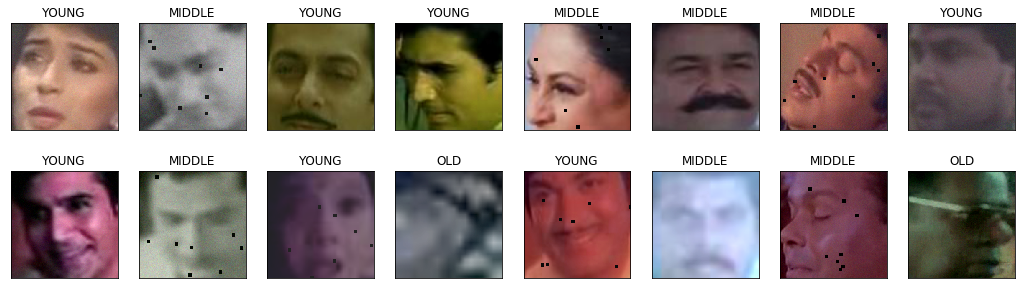

In [39]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
def im_show(img):
    npimg = img.numpy().transpose((1,2,0))*std + mean
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(npimg)
fig = plt.figure(figsize=(18,5))

for i in np.arange(16):
    ax = fig.add_subplot(2,8,i+1,xticks=[],yticks=[])
    im_show(img[i])
    ax.set_title(classes[label[i]])

In [40]:
from torchvision import models
resnet = models.resnet50(pretrained=True,progress = True)

In [41]:
for param in resnet.parameters():
    param.requires_grad=False
fc_inputs = resnet.fc.in_features
resnet.fc = nn.Linear(fc_inputs,3)

In [42]:
from torch.optim import lr_scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(), lr=0.001, betas=(0.9, 0.999),weight_decay=0.001)
scheduler = ReduceLROnPlateau(optimizer,factor=0.33, mode="min", patience=2)

In [43]:
def train_model(dataloaders,model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()
    dataset_sizes = {'train': len(dataloaders['train'].dataset), 
                     'val': len(dataloaders['val'].dataset)}
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    number_of_iter = 0
    acc_train = []
    acc_val = []
    loss_train = []
    loss_val = []
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  
            else:
                model.eval()   

            current_loss = 0.0
            current_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)

            epoch_loss = current_loss / dataset_sizes[phase]
            epoch_acc = current_corrects.double() / dataset_sizes[phase]
            if phase=="train":
                acc_train.append(epoch_acc)
                loss_train.append(epoch_loss)
            else:
                acc_val.append(epoch_acc)
                loss_val.append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(),'best_weights.pth')
                torch.save(optimizer.state_dict(), 'optimizer.pth')

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    model.load_state_dict(best_model_wts)
    
    
    return model,acc_val,acc_train,loss_train,loss_val

In [44]:
resnet = resnet.to(device)
dataloaders = {"train":trainloader,"val":valloader}
num_epochs=15
start_time = time.time()
model,acc_val,acc_train,loss_train,loss_val = train_model(dataloaders, resnet, criterion, optimizer, scheduler, num_epochs=num_epochs)

Epoch 0/14
train Loss: 0.9203 Acc: 0.5768
val Loss: 0.8006 Acc: 0.6306

Epoch 1/14
train Loss: 0.8913 Acc: 0.5942
val Loss: 0.7943 Acc: 0.6361

Epoch 2/14
train Loss: 0.8799 Acc: 0.5983
val Loss: 0.7794 Acc: 0.6494

Epoch 3/14
train Loss: 0.8779 Acc: 0.5983
val Loss: 0.7907 Acc: 0.6457

Epoch 4/14
train Loss: 0.8646 Acc: 0.6080
val Loss: 0.7727 Acc: 0.6549

Epoch 5/14
train Loss: 0.8693 Acc: 0.6086
val Loss: 0.7808 Acc: 0.6499

Epoch 6/14
train Loss: 0.8636 Acc: 0.6088
val Loss: 0.7633 Acc: 0.6534

Epoch 7/14
train Loss: 0.8622 Acc: 0.6068
val Loss: 0.7707 Acc: 0.6537

Epoch 8/14
train Loss: 0.8583 Acc: 0.6138
val Loss: 0.7544 Acc: 0.6675

Epoch 9/14
train Loss: 0.8591 Acc: 0.6095
val Loss: 0.7717 Acc: 0.6532

Epoch 10/14
train Loss: 0.8531 Acc: 0.6144
val Loss: 0.7622 Acc: 0.6617

Epoch 11/14
train Loss: 0.8536 Acc: 0.6098
val Loss: 0.7542 Acc: 0.6647

Epoch 12/14
train Loss: 0.8498 Acc: 0.6144
val Loss: 0.7997 Acc: 0.6444

Epoch 13/14
train Loss: 0.8486 Acc: 0.6149
val Loss: 0.7555 A

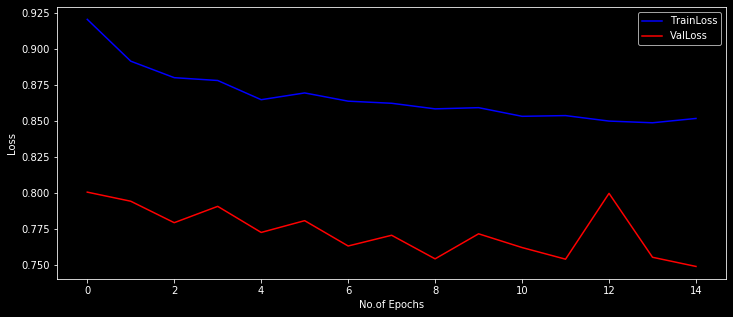

In [45]:
epoch = []
for x in range(num_epochs):
    epoch.append(x)
plt.style.use('dark_background')
fig = plt.figure(figsize = (12,5))
plt.plot(epoch,loss_train,label = 'TrainLoss',color = 'blue')
plt.plot(epoch,loss_val,label = 'ValLoss',color = 'red')
plt.xlabel('No.of Epochs')
plt.ylabel('Loss')
plt.legend()

In [46]:
sample = pd.read_csv('sample_submission.csv')

In [47]:
sample.head()

,Class,ID
0,MIDDLE,25321.jpg
1,MIDDLE,989.jpg
2,MIDDLE,19277.jpg
3,MIDDLE,13093.jpg
4,MIDDLE,5367.jpg


In [48]:
output = pd.DataFrame(index = sample.index,columns = sample.keys())
output['ID'] = sample['ID']

In [49]:
output.head()

,Class,ID
0,NaN,25321.jpg
1,NaN,989.jpg
2,NaN,19277.jpg
3,NaN,13093.jpg
4,NaN,5367.jpg


In [50]:
sample = sample[["ID","Class"]]
sample.head()

,ID,Class
0,25321.jpg,MIDDLE
1,989.jpg,MIDDLE
2,19277.jpg,MIDDLE
3,13093.jpg,MIDDLE
4,5367.jpg,MIDDLE


In [51]:
testdata = Age(sample,phase = 'test')

In [52]:
testloader = DataLoader(testdata,batch_size = 16)

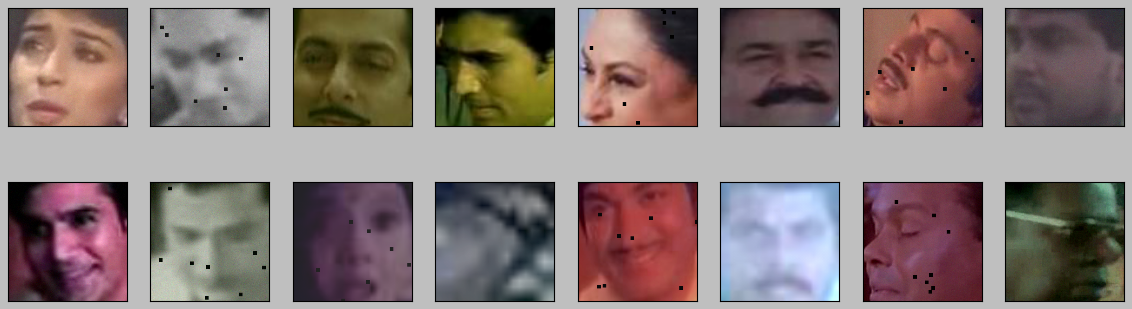

In [54]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
def im_show(img):
    npimg = img.numpy().transpose((1,2,0))*std + mean
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(npimg)
plt.style.use('classic')
fig = plt.figure(figsize=(18,5))
for i in np.arange(16):
    ax = fig.add_subplot(2,8,i+1,xticks=[],yticks=[])
    im_show(img[i])

In [55]:
def test_submission(model):
    since = time.time()
    sub_output = []
    model.train(False)
    for data in testloader:
        inputs,labels = data
        inputs = inputs.to(device)
        outputs = model(inputs)
        _,pred = torch.max(outputs.data,1)
        pred = pred.data.cpu().numpy()
        sub_output.append(pred.data)
    sub_output = np.concatenate(sub_output)
    output['Class'] = sub_output
    print()
    time_elapsed = time.time() - since
    print('Run complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

In [56]:
test_submission(model)


Run complete in 1m 12s


In [57]:
output.head()

,Class,ID
0,0,25321.jpg
1,2,989.jpg
2,0,19277.jpg
3,0,13093.jpg
4,1,5367.jpg


In [58]:
d = {0:'MIDDLE',1:'OLD',2:'YOUNG'}
output['Class'] = output['Class'].map(d)
output.head()

,Class,ID
0,MIDDLE,25321.jpg
1,YOUNG,989.jpg
2,MIDDLE,19277.jpg
3,MIDDLE,13093.jpg
4,OLD,5367.jpg


In [59]:
output.to_csv('epoch20noaug.csv',index=False)